###  GIAI ĐOẠN 1 - THU THẬP `LINK JOB` TUYỂN DỤNG NGÀNH IT TRÊN WEBSITE TOPCV

---

#### Mục tiêu

Thu thập toàn bộ các liên kết (URL) dẫn tới các bài đăng tuyển dụng trong ngành Công nghệ Thông tin trên 
[TopCV](https://www.topcv.vn/tim-viec-lam-cong-nghe-thong-tin-cr257?type_keyword=1&page=1&category_family=r257), phục vụ cho bước phân tích dữ liệu và khai thác nội dung sau này.

### **Giai đoạn 1.1: Crawl tất cả các URL của trang hiển thị danh sách công việc**

* Do trang có nhiều page, ta dùng vòng lặp để tạo danh sách URL các trang như sau:

*Nhận xét:* Không cần dùng công cụ tự động hóa như Selenium để click từng trang. Thay vào đó, chỉ cần biết quy luật URL phân trang là có thể sinh ra toàn bộ các link cần thiết. Tính đến 07/12/2025 hiện có 71 pages và 3527 jobs.

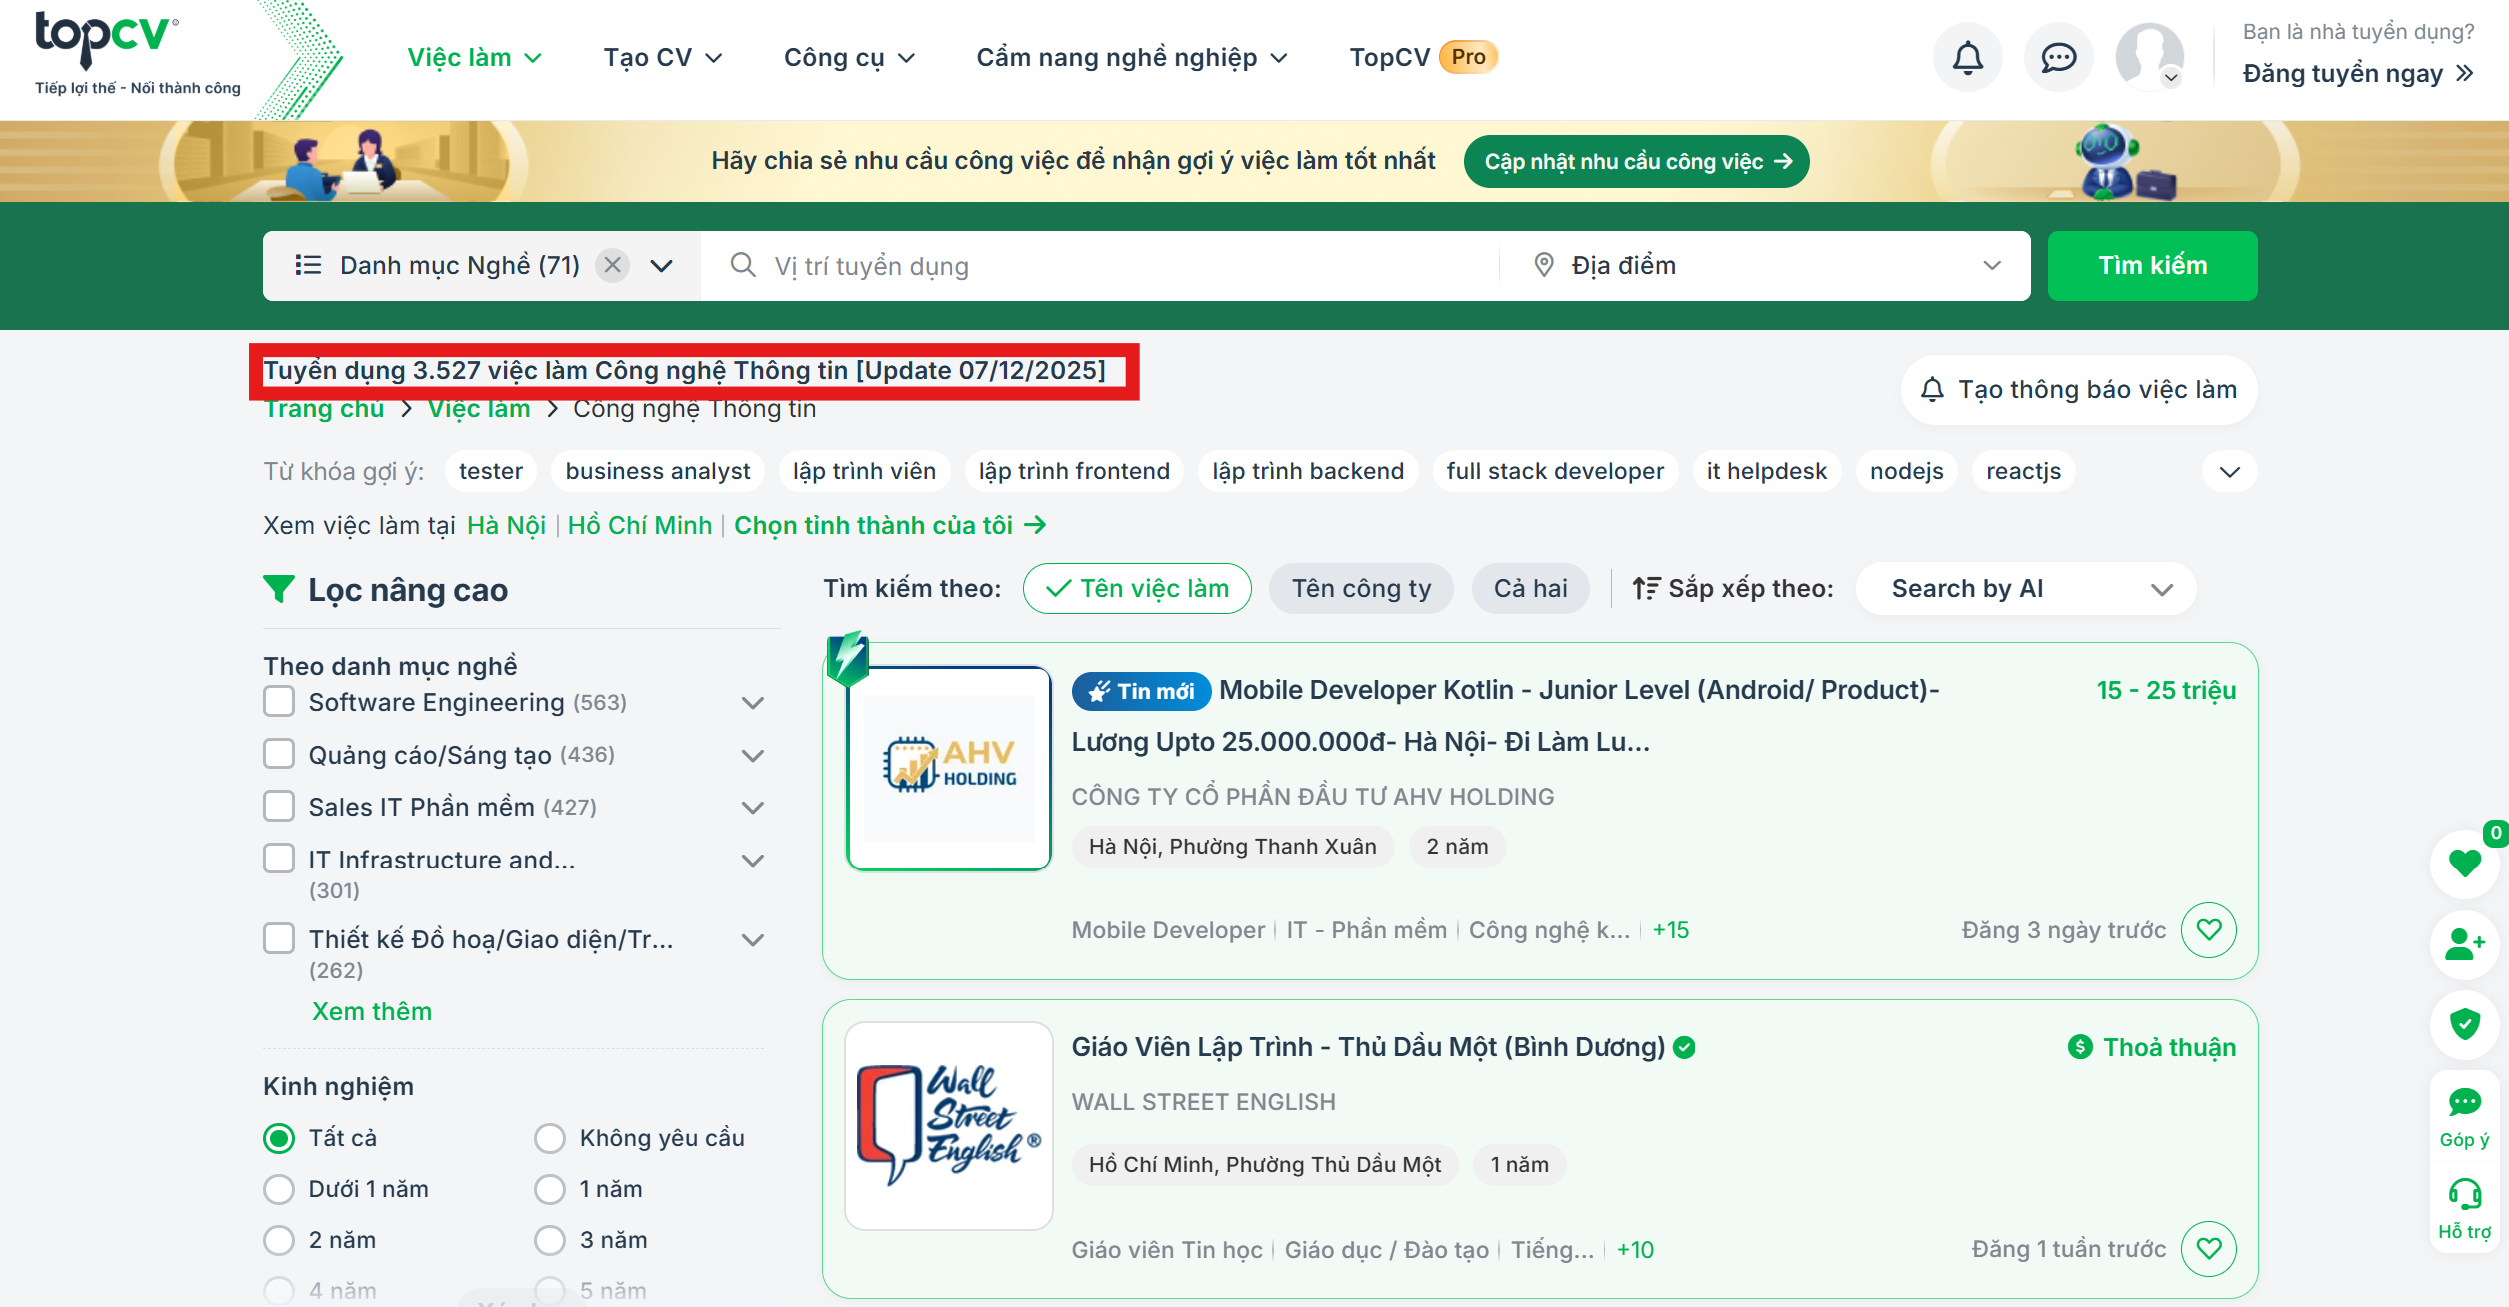

In [5]:
urls = [f"https://www.topcv.vn/tim-viec-lam-cong-nghe-thong-tin-cr257?type_keyword=1&page={i}&category_family=r257" for i in range(1, 2)]

for url in urls:
    print(url)

https://www.topcv.vn/tim-viec-lam-cong-nghe-thong-tin-cr257?type_keyword=1&page=1&category_family=r257


### **Giai đoạn 1.2: Trích xuất URL từng bài đăng trên mỗi trang danh sách**

* Sử dụng **Selenium** để đảm bảo nội dung đã load đầy đủ trước khi trích xuất.
* Cụ thể, ta chờ đến khi phần tử chứa avatar trong `box-header` xuất hiện (dấu hiệu bài đăng đã load xong) rồi mới bắt đầu lấy các link tuyển dụng.

* Sử dụng XPATH để lọc ra các url của các tin tuyển dụng

In [14]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

def create_driver():
    chrome_options = Options()
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")
    chrome_options.add_argument("--disable-blink-features=AutomationControlled")

    service = Service()
    driver = webdriver.Chrome(service=service, options=chrome_options)
    return driver

In [15]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd

def crawl_job_links(driver, urls):
    data = []
    job_id = 1

    for url in urls:
        driver.get(url)
        time.sleep(3)

        try:
            WebDriverWait(driver, 10).until(
                EC.presence_of_all_elements_located(
                    (By.XPATH, '//h3[contains(@class,"title")]//a[@href]')
                )
            )

            posts = driver.find_elements(
                By.XPATH, '//h3[contains(@class,"title")]//a[@href]'
            )

            for post in posts:
                href = post.get_attribute("href")
                title = post.text.strip()

                data.append({
                    "ID": job_id,
                    "title": title,
                    "link": href
                })
                job_id += 1

        except Exception as e:
            print(f"Lỗi ở URL {url}: {e}")

    return pd.DataFrame(data)

In [16]:
driver = create_driver()

df_jobs = crawl_job_links(driver, urls)
df_jobs.head()

,ID,title,link
0,1,Nhân Viên Kinh Doanh/ Tư Vấn/ Sales Phần Mềm H...,https://www.topcv.vn/brand/congtycophanmisa/tu...
1,2,Nhân Viên Kinh Doanh Ngành Game,https://www.topcv.vn/viec-lam/nhan-vien-kinh-d...
2,3,Business Analyst (Lending/Bankhub),https://www.topcv.vn/viec-lam/business-analyst...
3,4,AI/Robotics Engineer,https://www.topcv.vn/viec-lam/ai-robotics-engi...
4,5,Network Engineer (Triển Khai),https://www.topcv.vn/viec-lam/network-engineer...


In [17]:
print(f"Tổng số bài đăng thu thập được: {len(df_jobs)}")

Tổng số bài đăng thu thập được: 50


### **Giai đoạn 1.3: Lưu trữ kết quả**

* Sau khi đã có danh sách các URL bài đăng, cậu lưu lại vào một file `.csv` để phục vụ cho giai đoạn phân tích tiếp theo:

### Kết quả đạt được

* ✅ Tổng số **trang đã duyệt**:
* ✅ Số lượng **URL bài đăng tuyển dụng** thu thập được là: *(có thể đếm bằng `len(df_jobs)` khi chạy)*

In [19]:
import os

base_dir = os.getcwd()
crawling_folder_path = os.path.dirname(base_dir)
src_folder_path = os.path.dirname(crawling_folder_path)
analysis_job_trend_dir = os.path.dirname(src_folder_path)

data_dir = os.path.join(analysis_job_trend_dir, "data")
job_list_dir = os.path.join(data_dir, "job-list")

if not os.path.exists(job_list_dir):
    os.makedirs(job_list_dir, exist_ok=True)

save_path = os.path.join(job_list_dir, "job_list.csv")

df_jobs.to_csv(save_path, index=False, encoding="utf-8-sig")

print(f"Đã lưu file vào: {save_path}")

Đã lưu file vào: d:\Git\DS111-DoAn\analysis-job-trend\data\job-list\job_list.csv


### Tiếp theo

* **Giai đoạn 2**: Dựa trên các URL vừa thu thập, tiến hành *cào HTML* của các phần mang nội dung của các bài đăng.
* Sau đó, phân tích dữ liệu bằng các kỹ thuật Web Scraping để trích xuất các trường như: tên công ty, vị trí, lương, kỹ năng, mô tả công việc,... Ngoài ra giai đoạn 2 sẽ khá phức tạp khi phải bypass bảo mật chặn bot cloudflared.